In [1]:
# ** CHEQUEAR QUÉ LIBRERIAS ESTOY Y NO ESTOY USANDO** 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl

from scipy.interpolate import interp1d

### Cargo los archivos de polvo o temperatura

In [2]:
#dust_file='Dust records corregidos 23-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme
dust_file='Dust records uniformes 16-05-22.xlsx'  #Base de datos sin valores repetidos, Uniforme
#dust_file='Dust records uniformes e interpolados 16-05-22.xlsx'  #Base de datos sin valores repetidos, Uniforme


#temp_file='Temps records corregidos 15-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme
#temp_file='Temps records uniformes 16-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme

In [2]:
id_columns=['Name','Data id','Latitud','Longitud','Age units','Data units','Data length']


#id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
#id_data=pd.read_excel(temp_file,sheet_name=0,usecols=id_columns)

#id_data.head()

In [4]:
df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)
#df_data=pd.read_excel(temp_file,sheet_name=1,skiprows=1)

df_data.head()

,Year,DustFlux,Year.1,DustFlux.1,Year.2,nssCa2 flux,Year.3,Ca2+,Year.4,Th norm Litho flux,...,Year.10,DustFlux.5,Year.11,MAR,Year.12,DustConc,Year.13,Ca2+.1,Year.14,Part conc
0,4.509000,513.3435,0.375,0.259,1.199480,150.00,3.791000,0.866667,14.424956,0.129675,...,1.150000,238095.240,0.0,10.72,5.00,305.363666,7.800600,10.8,10.147900,61.5565
1,6.220582,384.7395,0.400,0.329,1.520704,102.60,3.803001,1.550000,26.062204,0.188892,...,3.521513,271867.615,2.0,10.40,5.05,471.395055,8.421761,6.8,10.224514,71.9120
2,7.932164,860.8440,0.425,0.652,1.841928,189.80,3.815003,0.838333,37.699451,0.150754,...,5.893027,297619.050,4.0,8.57,5.10,266.747998,9.042922,6.0,10.301128,52.3480
3,9.643746,879.1290,0.450,0.341,2.163152,140.65,3.827004,1.428571,49.336699,0.124764,...,8.264540,229386.625,6.0,7.80,5.15,252.657484,9.664084,7.6,10.377742,45.4695
4,11.355328,755.5000,0.475,0.312,2.484376,164.40,3.839006,0.991667,60.973947,0.124176,...,10.636053,197878.860,8.0,7.98,5.20,338.667402,10.285245,7.2,10.454356,51.2840


In [5]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data.size/len(df_data) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis=[] #Lista de dupla de dataframes: Age & Values
new_length=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]][:id_data['Data length'][int(i/2)]]
        dupla.index=[j for j in range(0, len(dupla))] 
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

#### Comparo bases original-uniforme uniforme-interpolada.  Reviso el comportamiento de los nan's en las bases de datos

#### Me falta la comparación original -interpolado, por un error en el length de las bases... 

In [3]:
dust_file='Dust records corregidos 23-05-22.xlsx' #Base de datos sin valores repetidos, No uniforme
dust_file2='Dust records uniformes 16-05-22.xlsx'  #Base de datos sin valores repetidos, Uniforme
dust_file3='Dust records uniformes e interpolados 16-05-22.xlsx'  #Base de datos sin valores repetidos, Uniforme

id_data=pd.read_excel(dust_file,sheet_name=0,usecols=id_columns)
df_data=pd.read_excel(dust_file,sheet_name=1,skiprows=1)
id_data2=pd.read_excel(dust_file2,sheet_name=0,usecols=id_columns)
df_data2=pd.read_excel(dust_file2,sheet_name=1,skiprows=1)
id_data3=pd.read_excel(dust_file3,sheet_name=0,usecols=id_columns)
df_data3=pd.read_excel(dust_file3,sheet_name=1,skiprows=1)


In [4]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data.size/len(df_data) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis=[] #Lista de dupla de dataframes: Age & Values
new_length=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data[[df_data.columns[i],df_data.columns[i+1]]][:id_data['Data length'][int(i/2)]]
        dupla.index=[j for j in range(0, len(dupla))] 
        lis.append(dupla)
        new_length=np.append(new_length,np.shape(dupla)[0])

In [5]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data2.size/len(df_data2) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis2=[] #lis2ta de dupla de dataframes: Age & Values
new_length2=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data2[[df_data2.columns[i],df_data2.columns[i+1]]][:id_data2['Data length'][int(i/2)]]
        dupla.index=[j for j in range(0, len(dupla))] 
        lis2.append(dupla)
        new_length2=np.append(new_length2,np.shape(dupla)[0])

In [6]:
#SEPARAR CADA UNA DE LAS COLUMNAS v.2
columns=df_data3.size/len(df_data3) #data.size = nxm ; len(data) = n -> cuociente = m = n°columnas
lis3=[] #lis3ta de dupla de dataframes: Age & Values
new_length3=np.array([])

for i in range(int(columns)):
    if (i+1)%2==1: #División completa, voy de 2 en 2
        dupla=df_data3[[df_data3.columns[i],df_data3.columns[i+1]]][:id_data3['Data length'][int(i/2)]]
        dupla.index=[j for j in range(0, len(dupla))] 
        lis3.append(dupla)
        new_length3=np.append(new_length3,np.shape(dupla)[0])

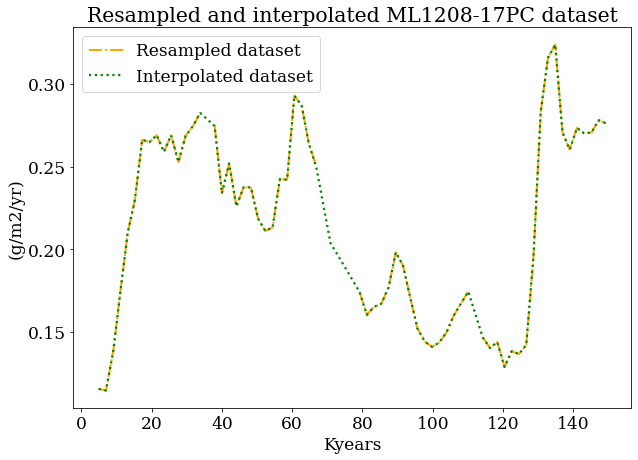

In [18]:
##Comparación de gráficos a mano, ya que las bases tienen len diferentes
i=5 #original
j=7 #resampled
k=7 #interpolated 
plt.subplots(figsize=(10, 7))
#plt.plot(lis[i][lis[i].columns[0]],lis[i][lis[i].columns[1]],label='Original dataset',linestyle='-',linewidth=1)
plt.plot(lis2[j][lis2[j].columns[0]],lis2[j][lis2[j].columns[1]],label='Resampled dataset',linestyle='-.',linewidth=2,color='orange')
plt.plot(lis3[k][lis3[k].columns[0]],lis3[k][lis3[k].columns[1]],label='Interpolated dataset',linestyle=':',linewidth=2.2,color='g')

#plt.title('Original and resampled '+id_data['Name'][i]+' dataset')
#plt.title('Resampled and interpolated '+id_data2['Name'][j]+' dataset')
plt.title('Resampled and interpolated '+id_data2['Name'][j]+' dataset')
plt.legend()
plt.xlabel('Kyears')
plt.ylabel(id_data['Data units'][i])
#plt.savefig('Original vs interpolated '+id_data['Name'][i]+'.pdf')
#plt.savefig('Original vs resampled '+id_data['Name'][i]+'.pdf')
plt.savefig('Resampled vs interpolated '+id_data['Name'][i]+'.pdf')
plt.show()


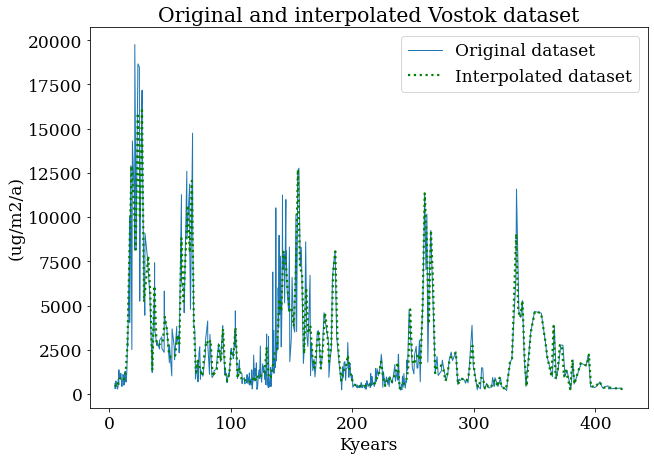

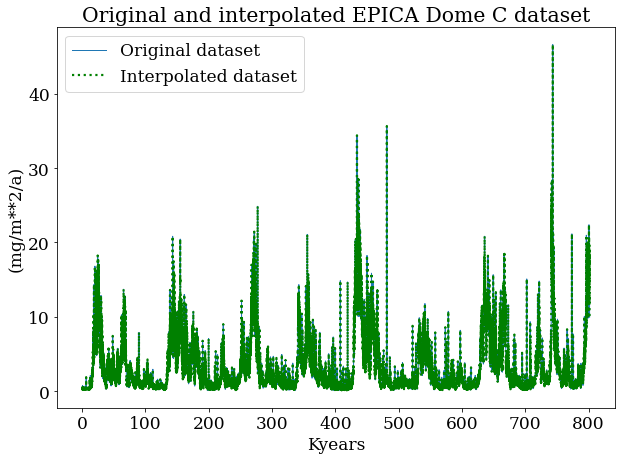

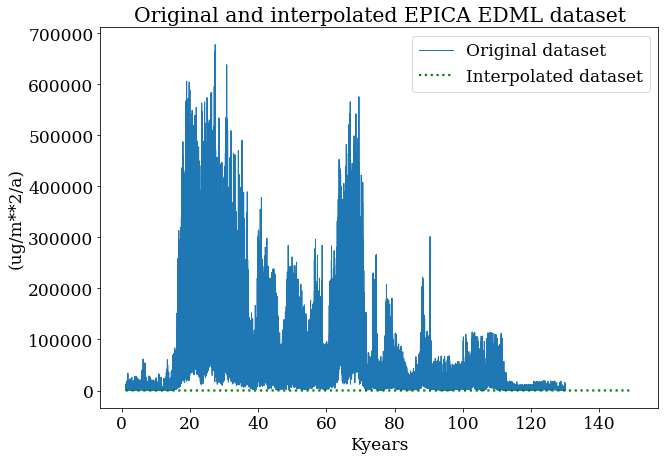

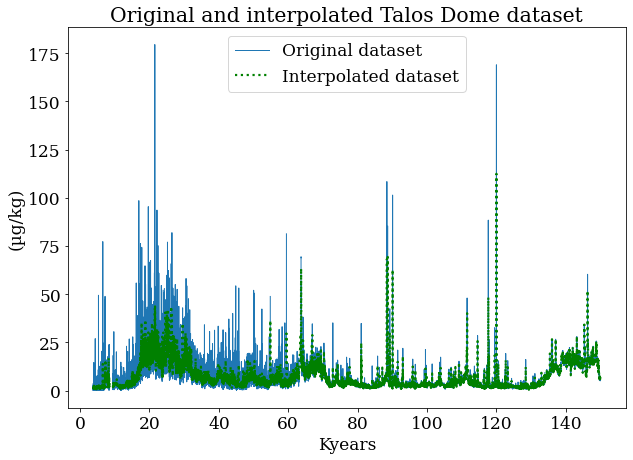

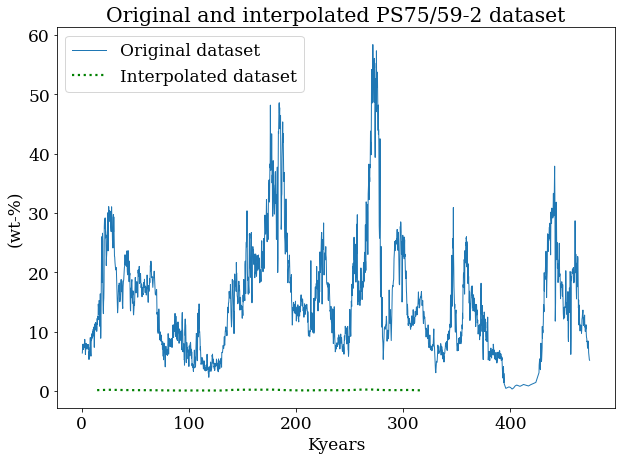

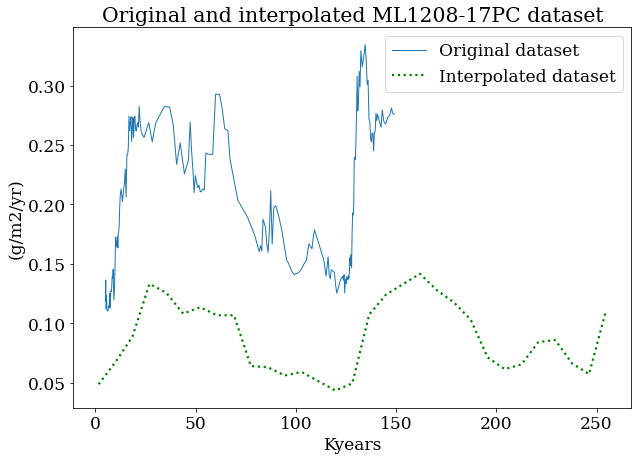

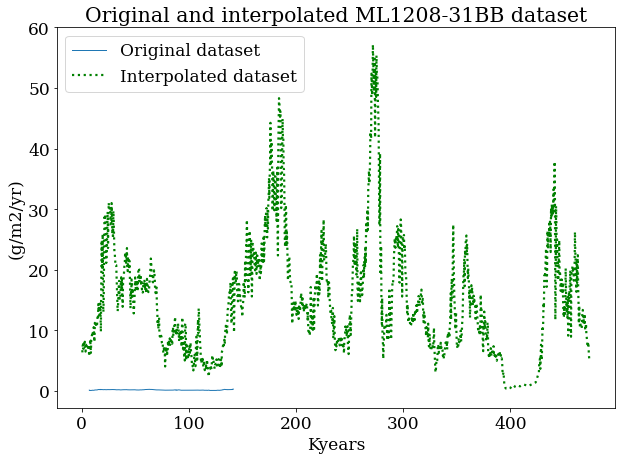

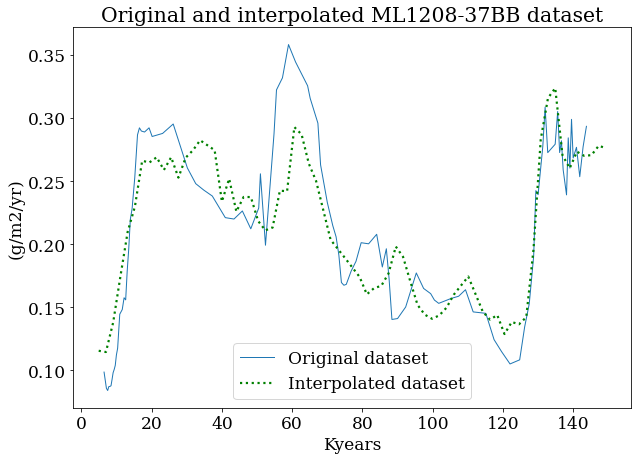

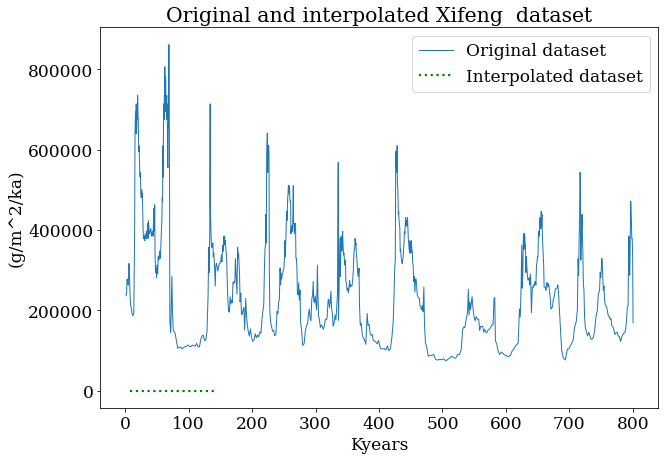

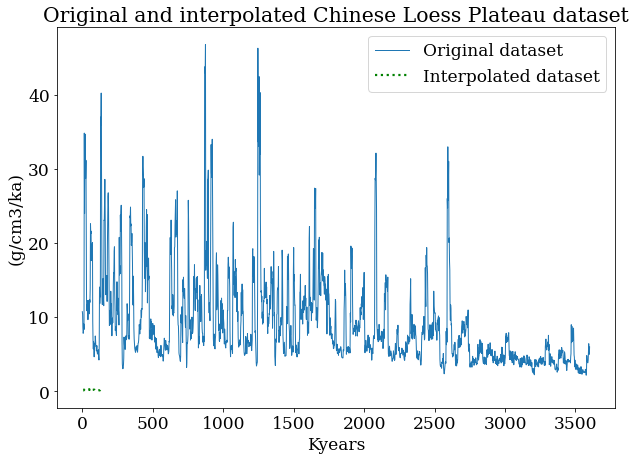

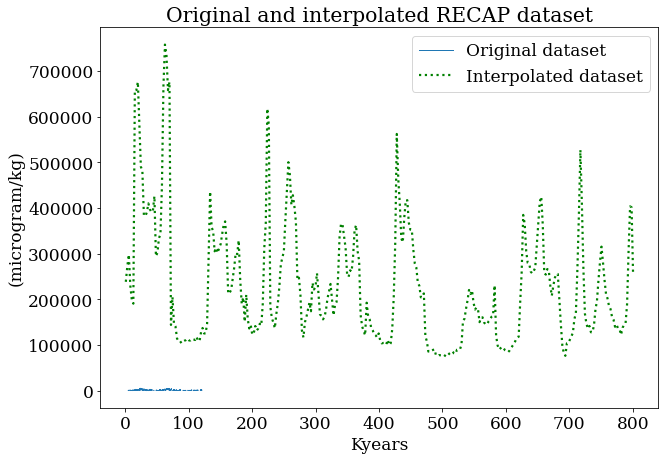

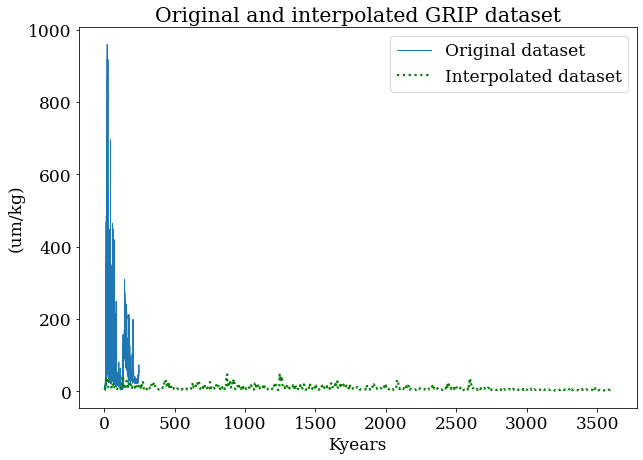

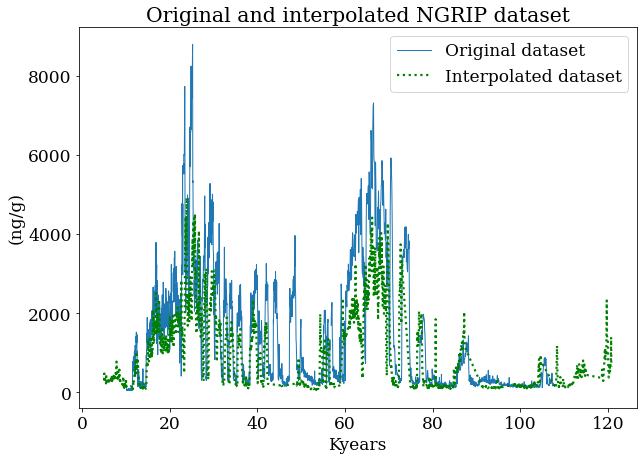

IndexError: list index out of range

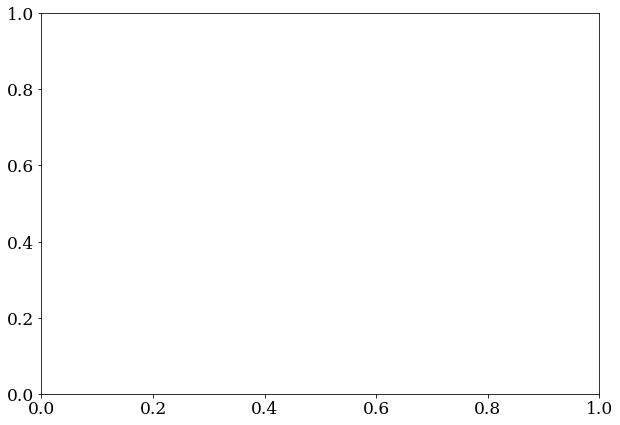

In [8]:
## Comparación de gráficos :Corregidos vs uniformes o Uniformes vs interpolados
for i in range(len(lis2)): 
    plt.subplots(figsize=(10, 7))
    
    plt.plot(lis[i][lis[i].columns[0]],lis[i][lis[i].columns[1]],label='Original dataset',linestyle='-',linewidth=1)
    
    plt.plot(lis3[i][lis3[i].columns[0]],lis3[i][lis3[i].columns[1]],label='Interpolated dataset',linestyle=':',linewidth=2.2,color='g')
    #plt.plot(lis2[i][lis2[i].columns[0]],lis2[i][lis2[i].columns[1]],label='Resampled dataset',linestyle='-.',linewidth=2,color='orange')
    
    plt.title('Original and interpolated '+id_data['Name'][i]+' dataset')
    #plt.title('Resampled and interpolated '+id_data['Name'][i]+' dataset')
    plt.legend()
    plt.xlabel('Kyears')
    plt.ylabel(id_data['Data units'][i])
    
    #try:
    #    plt.savefig('Original vs uniform '+id_data['Name'][i]+'.jpg')
    #except:
    #    plt.savefig('Original vs uniform PS75'+str(i)+'.jpg')
    
    #GUARDO 17PC
    #if id_data['Name'][i]=='ML1208-17PC':
    #    plt.savefig('Original vs interpolated '+id_data['Name'][i]+'.pdf')
    
    
    plt.show()

In [25]:
def moving_nan_counter(x, w):
    return 100*np.convolve(x, np.ones(w), 'valid') / w
def moving_age_counter(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [7]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 17}

mtpl.rc('font', **font)

In [38]:
np.shape(df_data2)

(31838, 30)

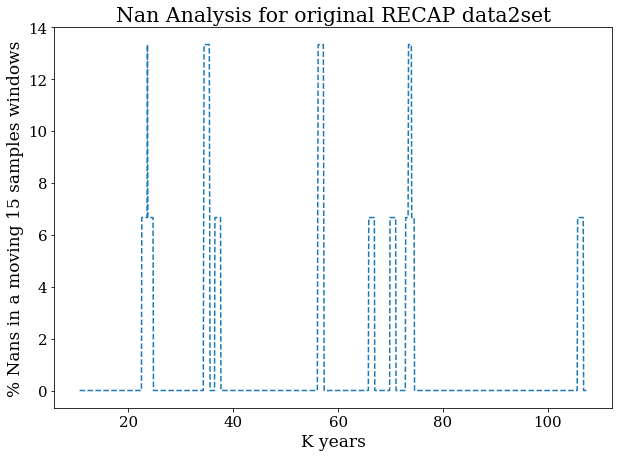

In [46]:
j=29
plt.subplots(figsize=(10, 7))
nan_graph=df_data2[df_data2.columns[j]][:id_data2['Data length'][int((j-1)/2)]].isna()
#nan_graph

ages=df_data2[df_data2.columns[j-1]][:id_data2['Data length'][int((j-1)/2)]]

#print(len(ages),len(nan_graph))

plt.plot(moving_age_counter(ages,15),moving_nan_counter(nan_graph,15),'--',label='w=15')
plt.xlabel('K years')
plt.ylabel('% Nans in a moving 15 samples windows')
plt.title('Nan Analysis for original '+id_data2['Name'][int((i-1)/2)]+' data2set')
plt.show()

1


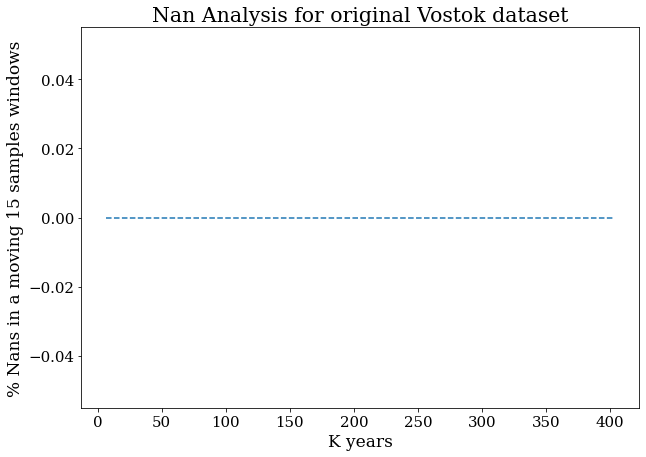

3


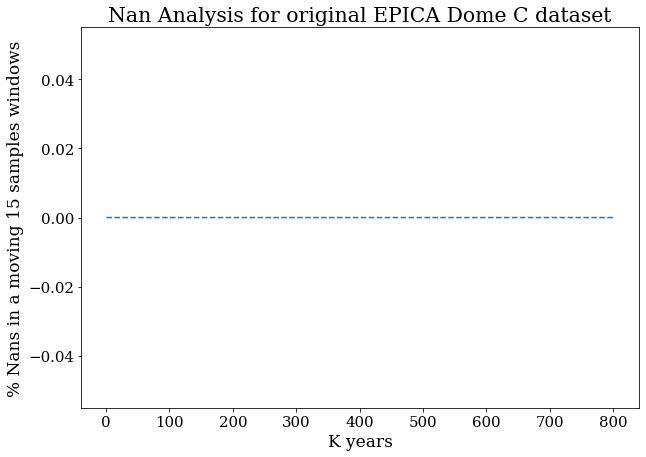

5


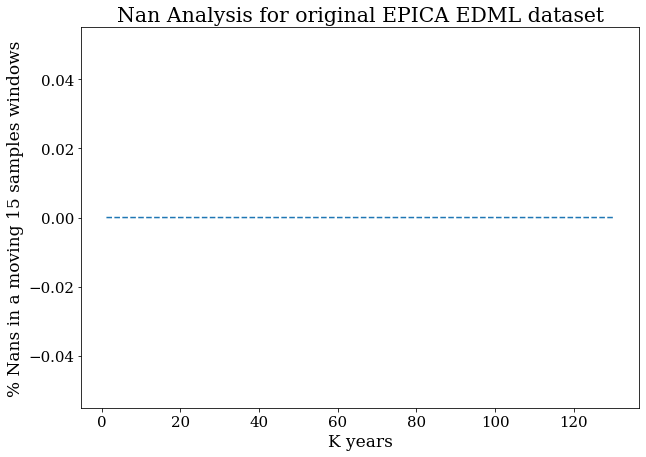

7


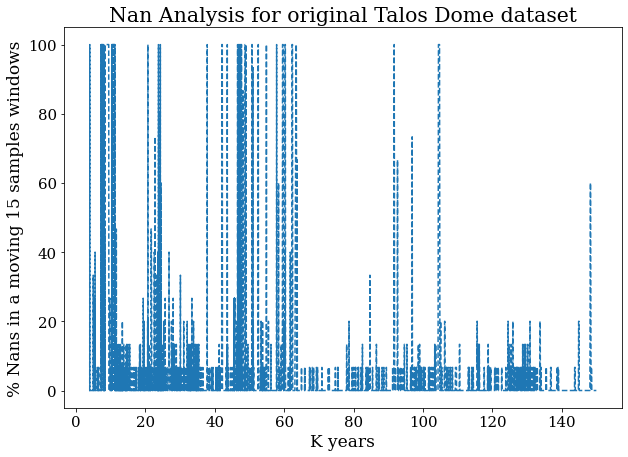

9


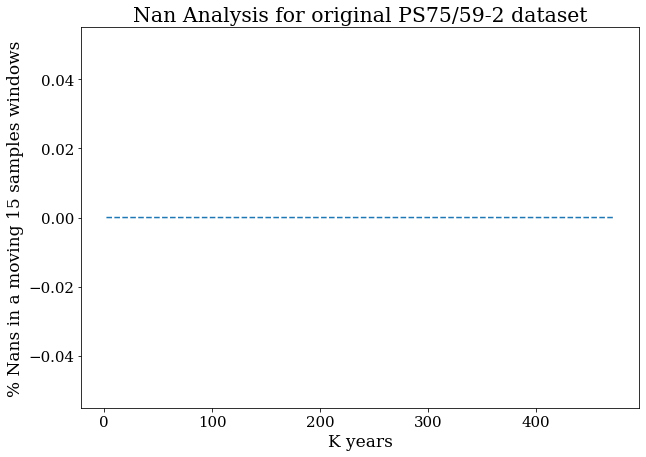

11


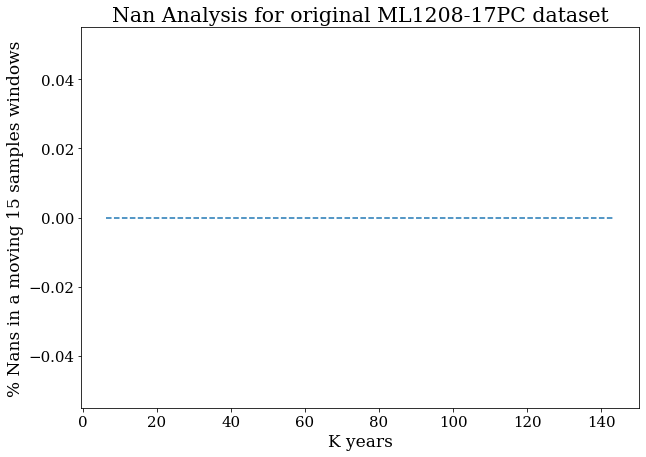

13


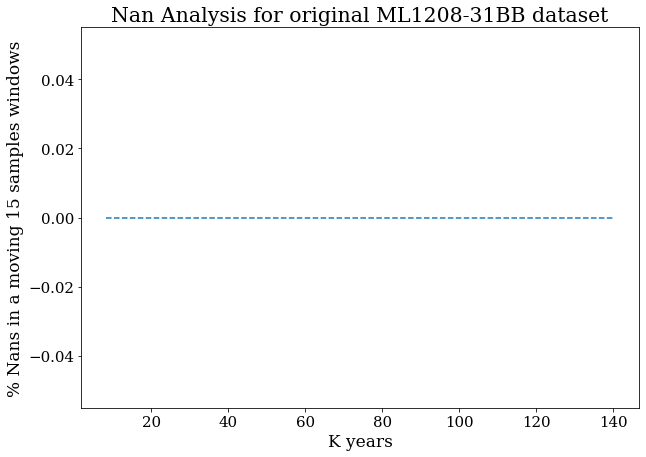

15


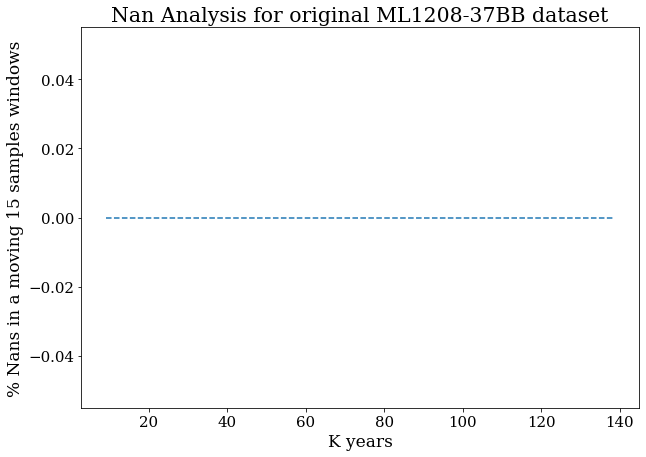

17


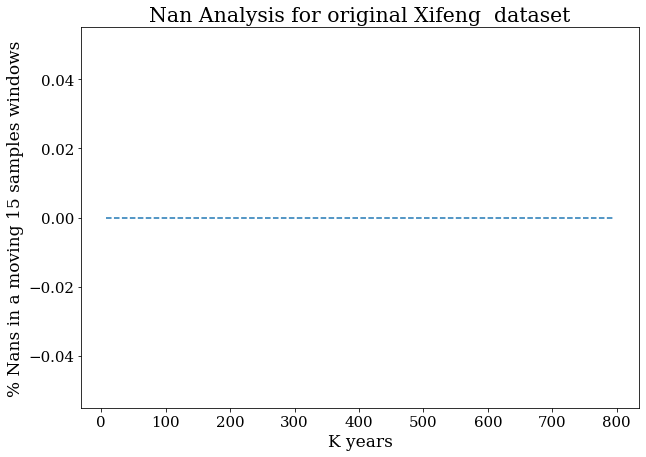

19


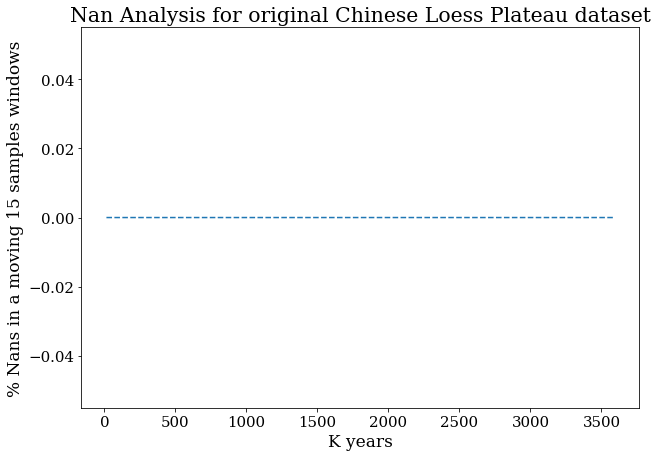

21


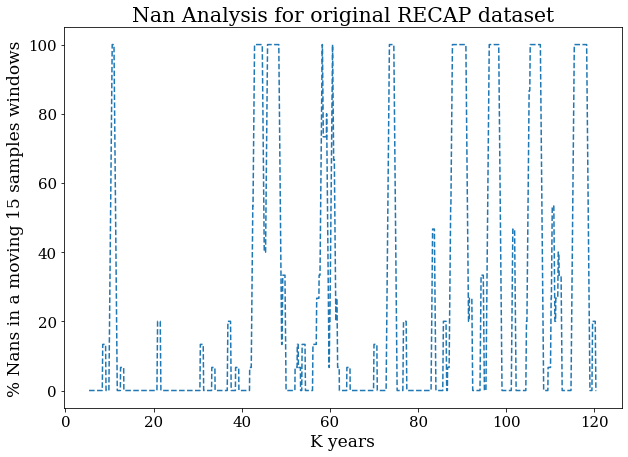

23


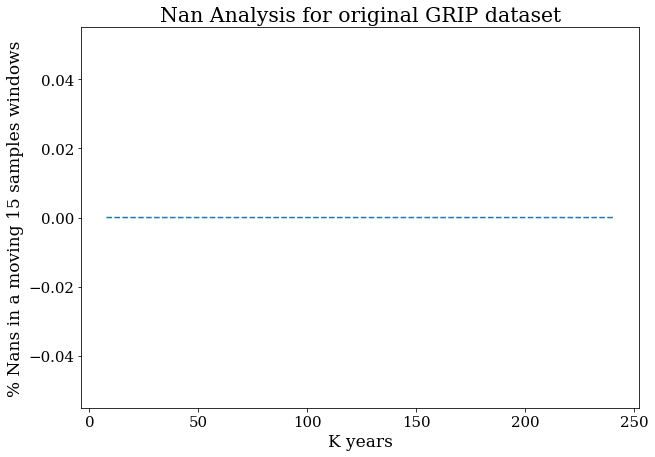

25


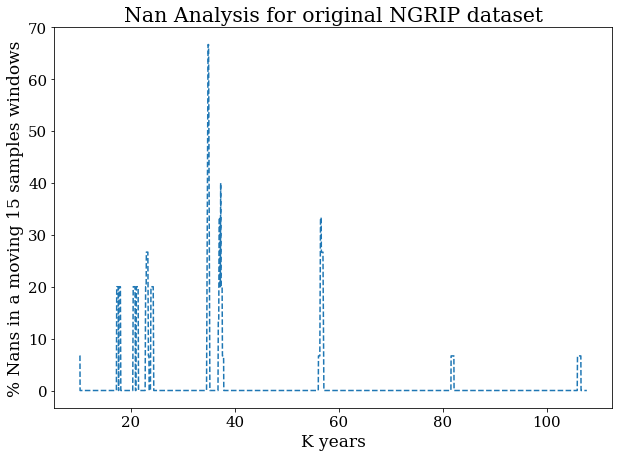

In [29]:
#FOR ORIGINAL DATASETS
for i in range(int(len(df_data.columns))): #de 0 a 8 para dust
    if i%2==1: #values
        print(i)
        plt.subplots(figsize=(10, 7))
        nan_graph=df_data[df_data.columns[i]][:id_data['Data length'][int((i-1)/2)]].isna()
        ages=df_data[df_data.columns[i-1]][:id_data['Data length'][int((i-1)/2)]]
        plt.plot(moving_age_counter(ages,15),moving_nan_counter(nan_graph,15),'--',label='w=15')
        plt.xlabel('K years')
        plt.ylabel('% Nans in a moving 15 samples windows')
        plt.title('Nan Analysis for original '+id_data['Name'][int((i-1)/2)]+' dataset')
        
        mtpl.rc('xtick', labelsize=15) 
        mtpl.rc('ytick', labelsize=15) 

        if id_data['Name'][int((i-1)/2)]=='NGRIP':
            plt.savefig('Nan analysis '+id_data['Name'][int((i-1)/2)]+'.pdf')
        plt.show()

1


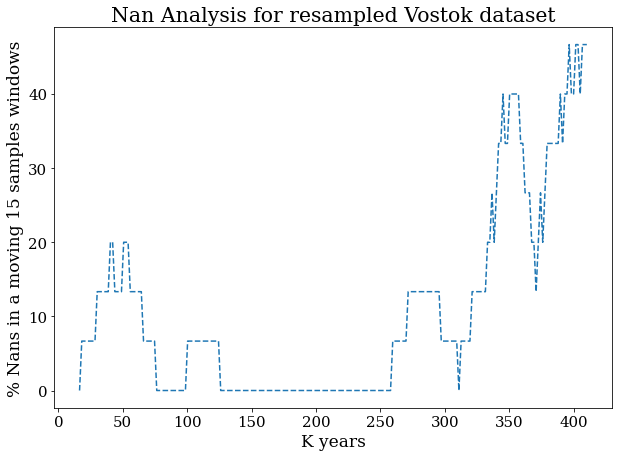

3


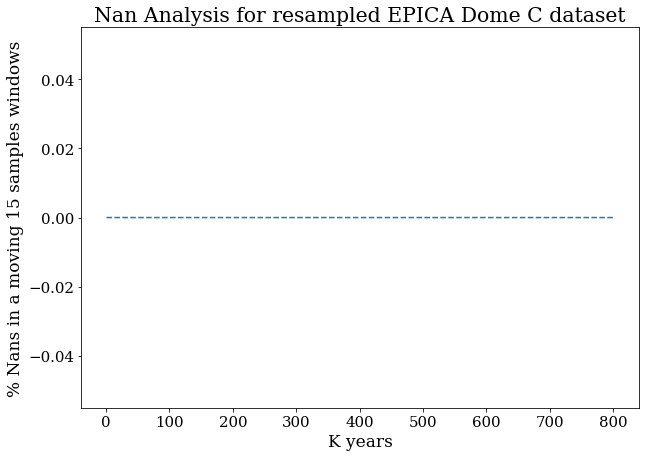

5


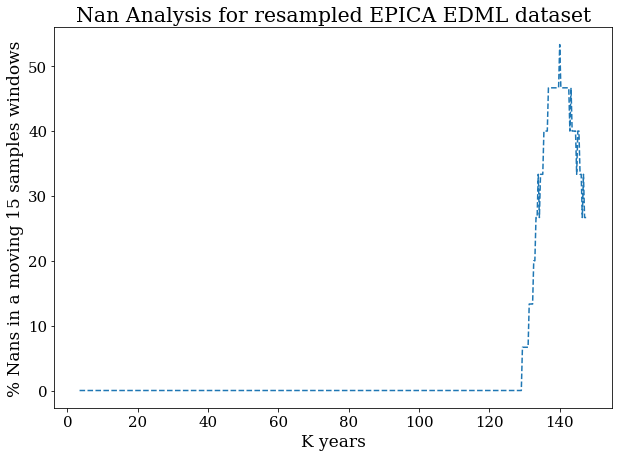

7


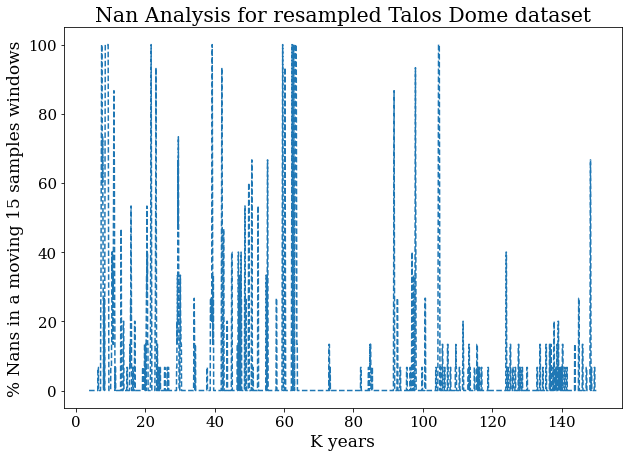

9


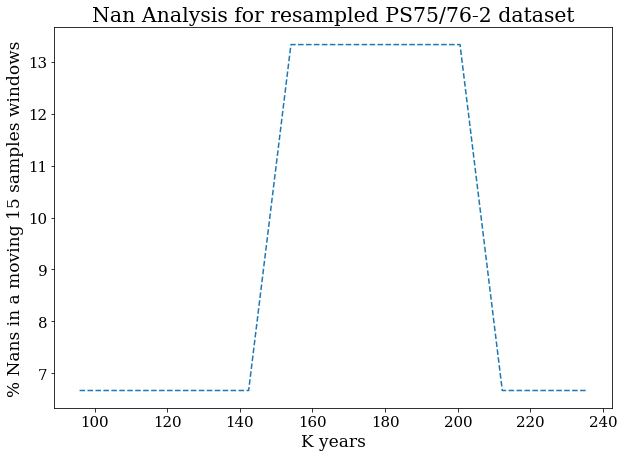

11


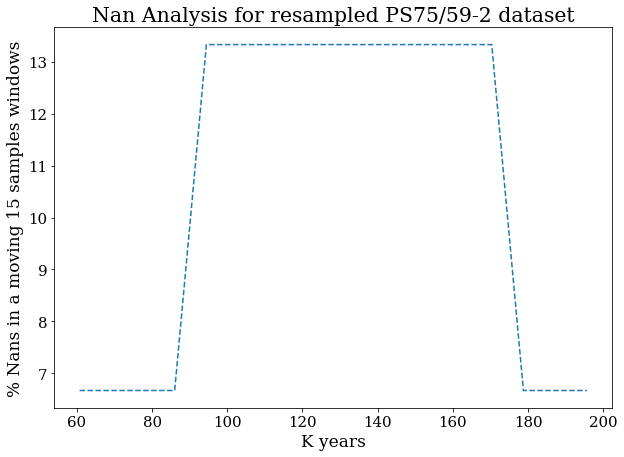

13


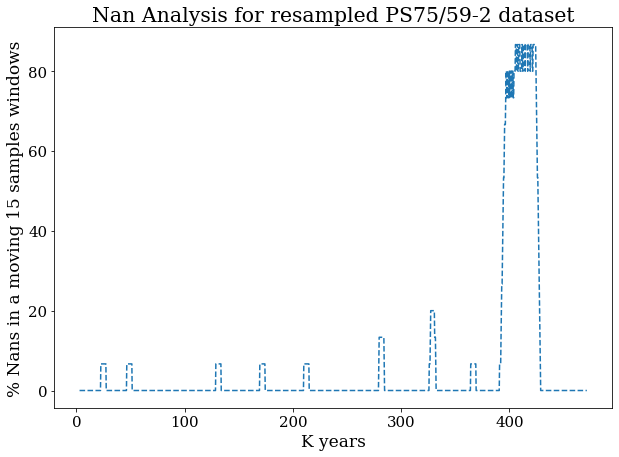

15


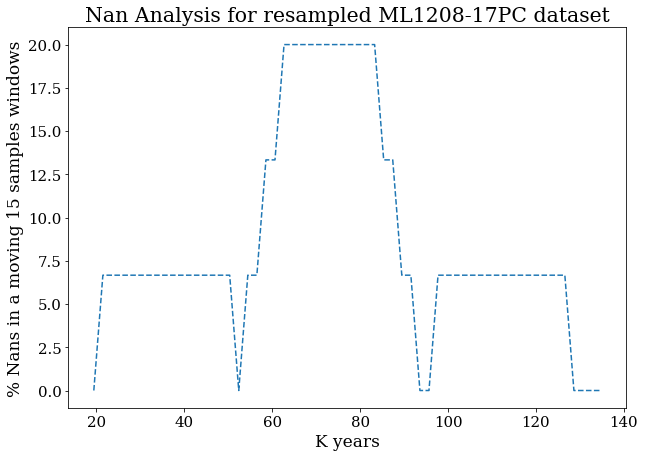

17


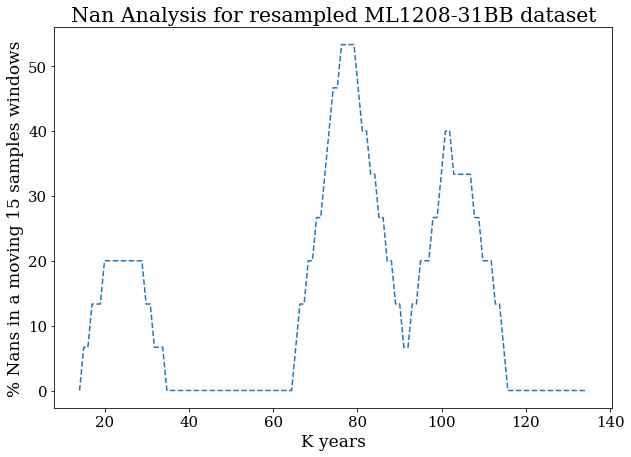

19


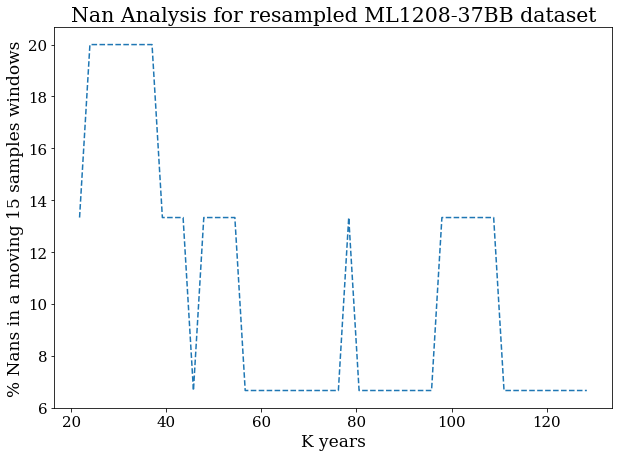

21


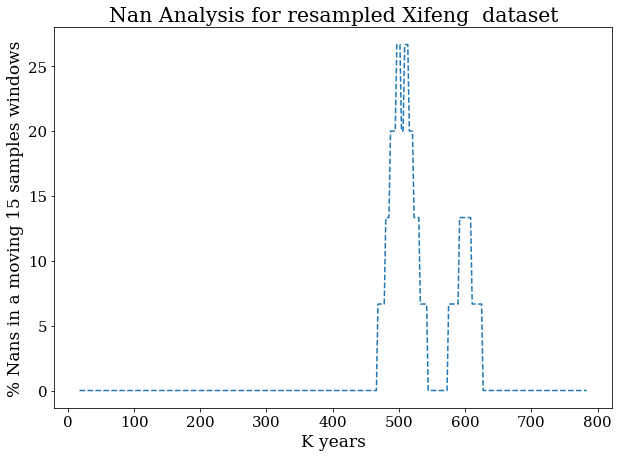

23


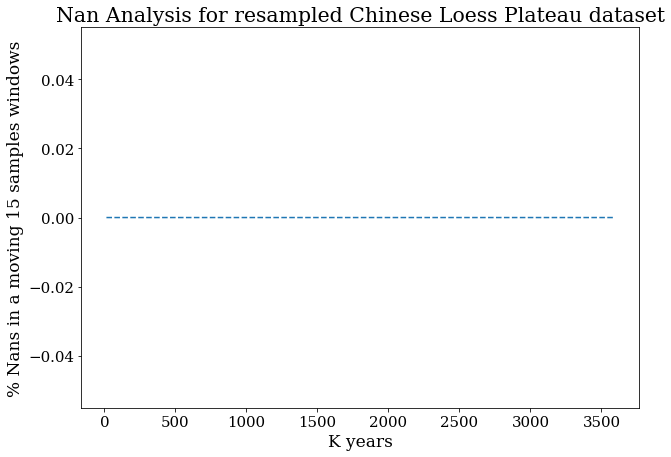

25


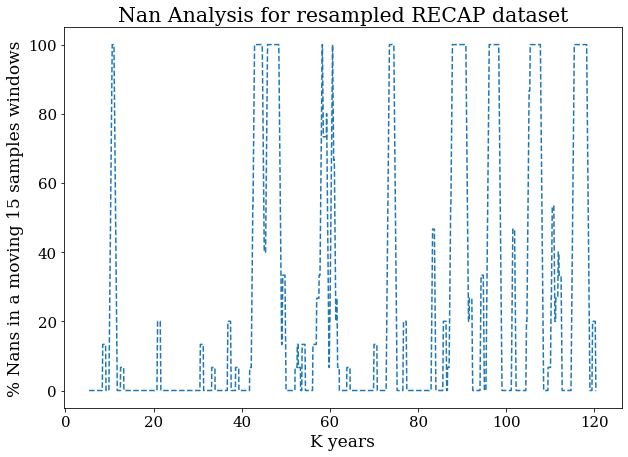

27


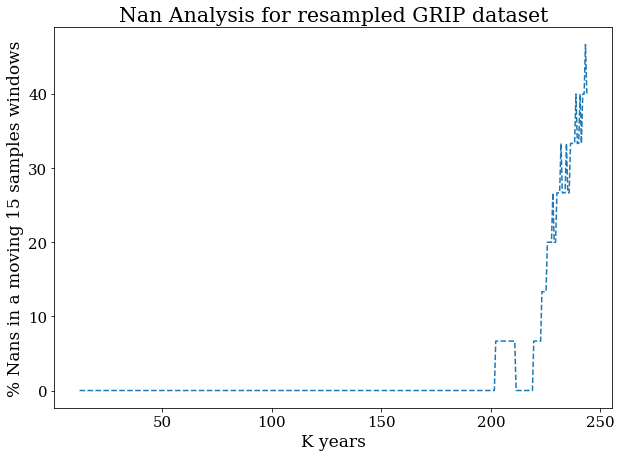

29


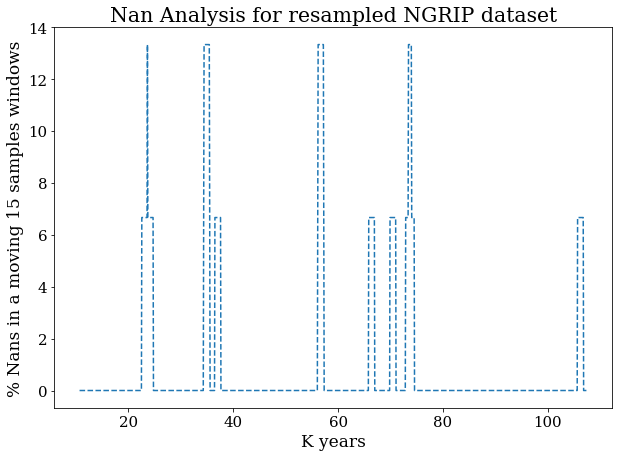

In [51]:
#FOR RESAMPLED DATASETS   ... ojo que "Dust records corregidos 23-05-22" y "16-05-22" tienen distintas dimensiones!
for i in range(int(len(df_data2.columns))): 
    if i%2==1: #values
        print(i)
        plt.subplots(figsize=(10, 7))
        nan_graph=df_data2[df_data2.columns[i]][:id_data2['Data length'][int((i-1)/2)]].isna()
        ages=df_data2[df_data2.columns[i-1]][:id_data2['Data length'][int((i-1)/2)]]
        plt.plot(moving_age_counter(ages,15),moving_nan_counter(nan_graph,15),'--',label='w=15')
        plt.xlabel('K years')
        plt.ylabel('% Nans in a moving 15 samples windows')
        plt.title('Nan Analysis for resampled '+id_data2['Name'][int((i-1)/2)]+' dataset')
        
        mtpl.rc('xtick', labelsize=15) 
        mtpl.rc('ytick', labelsize=15) 
        
        #Guardo las imágenes
        #try:
        #    plt.savefig('Nan analysis '+id_data['Name'][int((i-1)/2)]+'.jpg')
        #except:
         #   plt.savefig('Nan analysis PS75'+str(i)+'.jpg')
        
        #Para guardar solo NGRIP:
        if id_data2['Name'][int((i-1)/2)]=='NGRIP':
            plt.savefig('Nan analysis '+id_data2['Name'][int((i-1)/2)]+'.pdf')
            
        plt.show()

In [22]:
###Interpolaciones###

In [99]:
## ACA ELIJO CON CUAL PROXY VOY A TRABAJAR
dataset=13
n=dataset-1 #de python -> n+1 id dataset

original_age_dust=lis[n][lis[n].columns[0]]
original_values_dust=lis[n][lis[n].columns[1]]

#########################################
d_nan=original_values_dust.isna()
nan_in_row=[]
for i in d_nan:
    if i==False:
        nan_in_row.append(0)
    else:
        nan_in_row.append(1)
#########################################


#contador de nan's in row
aux=[]
contador_de_nans=0
for i in range(len(d_nan)):
    if d_nan[i]==True:
        contador_de_nans+=1
    if d_nan[i]==False and contador_de_nans!=0:
        #aux.append(0)
        aux.append(contador_de_nans)
        contador_de_nans=0
#########################################

new_dataset=[original_values_dust[n]] #n en vez de 0
indice_aux=0
indice_borrador=0

for i in range(1,len(nan_in_row)):
    if nan_in_row[i]==0:
        new_dataset.append(original_values_dust[i])
    if nan_in_row[i]==1:
        #print(i-1,'    ',i+aux[indice_aux])
        #print(indice_aux)
        try:            
            x = np.array([original_age_dust[i-1],original_age_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            y = np.array([original_values_dust[i-1],original_values_dust[i+aux[indice_aux]]])#tomo el valo anterior y el siguiente
            new_points=aux[indice_aux]
            f2=interp1d(x, y, kind='linear')
            xnew = np.linspace(x.min(), x.max(), num=int(new_points)+1, endpoint=False)
            points=f2(xnew)
            for p in range(1,len(points)):
                new_dataset.append(points[p])
            for j in range(1,aux[indice_aux]):
                nan_in_row[i+j]=2
            indice_aux+=1
            
        except:
            print('error en intervalo',i,'      [',i-1,' - ',i+aux[-1],']')
            print('len aux: ',len(aux))
            print('indice aux: ',indice_aux,'\n')
            indice_aux+=1    
        

In [100]:
print(len(original_values_dust))
print(len(new_dataset))

1918
1918


In [101]:
#guardar los datos
dust13_interpolado=pd.DataFrame(new_dataset, columns = ['values'])
dust13_interpolado.to_excel('dust13_interpolado.xlsx')